In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Lab 4: Logistic Regression

Just as we have linear and polynomial regression for predicting numerical values, we have another type of regression for predicting class labels of data, namely **logistic regression**. 

The reason its called logistic regression is because it makes use of the logistic function to generate output values. The logistic function is defined as:

$g(z) = \frac{1}{1 + e^{-z}}$

\

The reason we use the logistic function is because its range is bounded between 0 and 1. Anything else comes to mind when talking about values between 0 and 1? Probabilities! And we saw in lab 3 how deeply related probability and classification are.

<img src="https://drive.google.com/uc?export=view&id=1db86qd4W_4erTMC9no5P4ylWze6c2j7V" width="500" height="350" align="middle"/>

## Why use logistic function? Why not use linear regression? 

Let's see why we can't use linear regression for classification tasks with the help of an example.

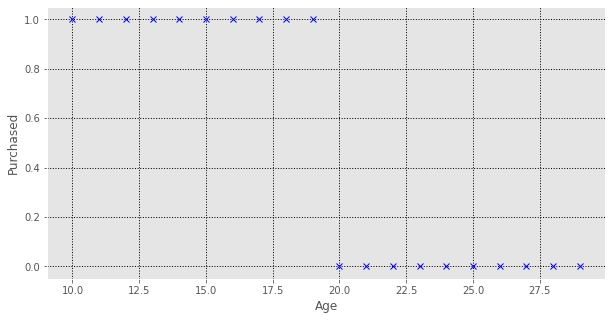

In [ ]:
x = np.array([i for i in range(10,30)])
y = np.concatenate([np.ones(10), np.zeros(10)])

fig = plt.figure(figsize=(10,5))
xlabel = 'Age'
ylabel = 'Purchased'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
_ = plt.plot(x, y, 'xb')

Suppose we have some product, and we collected data on the relationship between the age of a customer, and whether they purchased the item or not. Customers aged between 10 and 19 made the purchase (purchased=1), whereas those customers above the age of 19 did not (purchased=0).

\

Now, let's try and fit linear regression and logistic regression models to this data, and test it.

In [ ]:
def linear_regression(x,y):

  lin_regression = LinearRegression()
  lin_regression.fit(pd.DataFrame(x), y)

  lin_y_pred_1 = lin_regression.predict(pd.DataFrame(x))

  line_point_5 = x * 0 + .5

  fig = plt.figure(figsize=(10,5))
  xlabel = 'Age'
  ylabel = 'Purchased'
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(color='k', linestyle=':', linewidth=1)
  plt.plot(x, y, 'xb')
  plt.plot(x, lin_y_pred_1, '-r')
  plt.plot(x, line_point_5,'-g')
  plt.legend(["Data Points","Linear Regression Model","Decision Boundary"])
  plt.show()

  return lin_regression

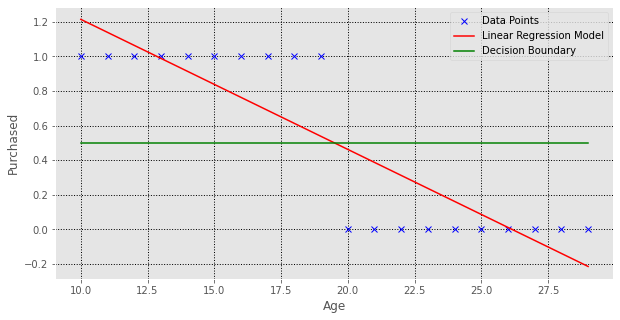

In [ ]:
lin_regression = linear_regression(x,y)

The green line is called the decision boundary, which is basically the line that divides the two classes on the cartesian plane.

In [ ]:
test_x = np.array([i for i in range(10,35,5)])
test_y_pred = lin_regression.predict(pd.DataFrame(test_x))
test_y_pred

array([ 1.21428571,  0.83834586,  0.46240602,  0.08646617, -0.28947368])

Since linear regression predictions are not probabilities, values greater than 0.5 are considered to belong to positive purchase class.

In [ ]:
def logistic_regression(x,y):

  log_regression = LogisticRegression()

  log_regression.fit(pd.DataFrame(x), y)

  y_pred = log_regression.predict_proba(pd.DataFrame(x))
  log_y_pred_1 = [item[1] for item in y_pred]

  line_point_5 = x * 0 + .5

  fig = plt.figure(figsize=(10,5))
  xlabel = 'Age'
  ylabel = 'Purchased'
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(color='k', linestyle=':', linewidth=1)
  plt.plot(x, y, 'xb')
  plt.plot(x, log_y_pred_1, '-r')
  plt.plot(x, line_point_5,'-g')
  plt.legend(["Data Points","Logistic Regression Model","Decision Boundary"])
  plt.show()

  return log_regression

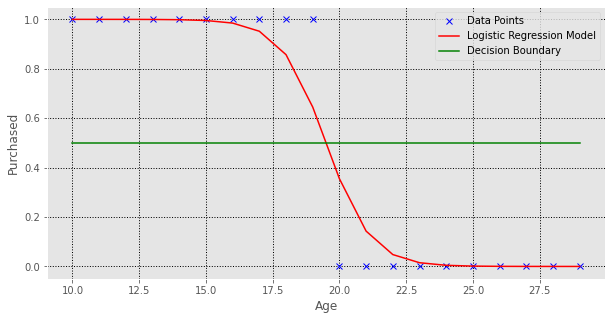

In [ ]:
log_regression = logistic_regression(x,y)

**Q:** What do you observe from the two graphs? Hint: think in terms of the decision boundary....

**A:** According to the linear regression model, any age greater than 19 would belong to class 0 (no purchase), and any age less than or equal to 19 would belong to class 1 (purchase made). The logistic regression curve follows the same trend. We can think of the age 19 as a turning point of sorts.

Now, say we've collected more data the next day, and add the new data to the existing data we had from day 1. We find that customers aged between 60 and 70 did not make a purchase, which is aligned with our earlier data as well.

In [ ]:
x = np.append(x, np.array([i for i in range(60,70)]))
y = np.append(y, np.zeros(10))

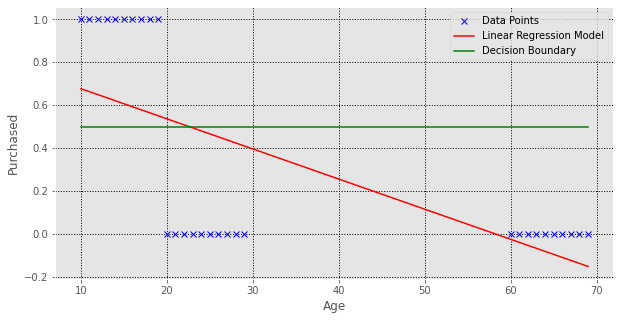

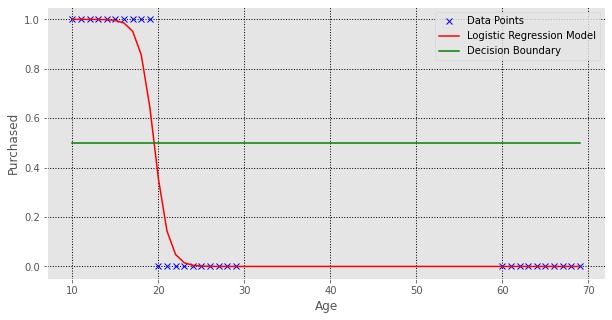

In [ ]:
lin_regression = linear_regression(x,y)
log_regression = logistic_regression(x,y)

In [ ]:
test_x = np.array([i for i in range(18,26)])

test_y_pred_lin = lin_regression.predict(pd.DataFrame(test_x))
print("Linear Regression Predictions:")
print(test_y_pred_lin)

test_y_pred_log = log_regression.predict_proba(pd.DataFrame(test_x))[:,1]
print("Logistic Regression Predictions:")
print(test_y_pred_log)

Linear Regression Predictions:
[0.56495292 0.55091537 0.53687781 0.52284026 0.50880271 0.49476516
 0.48072761 0.46669006]
Logistic Regression Predictions:
[0.85713668 0.64502441 0.35497751 0.14286435 0.04805457 0.01505849
 0.00460907 0.00140042]


We can now see where linear regression fails. The model tries to fit as many points as it can. By doing so, the turning point which was earlier 19 has now increased to 23, which is clearly wrong for the values 20, 21 and 22, which can be seen from the predictions on the test data.

\

On the other hand, the logistic regression model predicts the classes correctly, and perfectly models the relationship between the data. 

What we can conclude from these observations are that a probabilistic model is required for classification problems. Lab 3 covered the intuition behind MLE, cross-entropy and classification, and so now you should be able to appreaciate the motivation behind logistic regression.

## Applying logistic regression to MNIST digit Dataset

Let's see logistic regression in action with the MNIST digits dataset. 

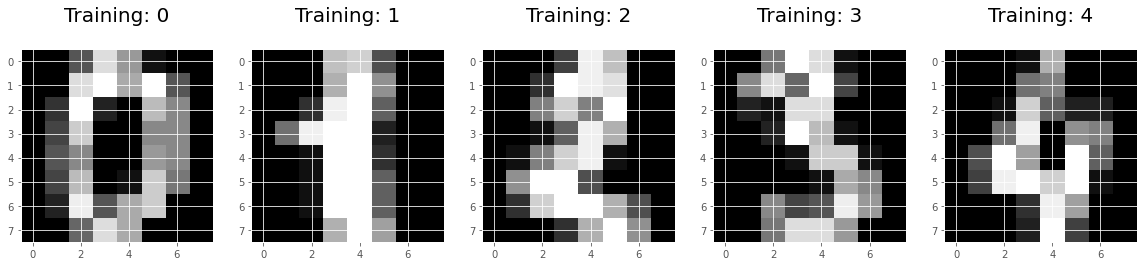

In [ ]:
# initializing and visualizing MNIST data

digits = load_digits()

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
log_reg = LogisticRegression()
log_reg = log_reg.fit(x_train,y_train)

PREDICTIONS:

[2 8 2 6 6 7 1 9 8 5]




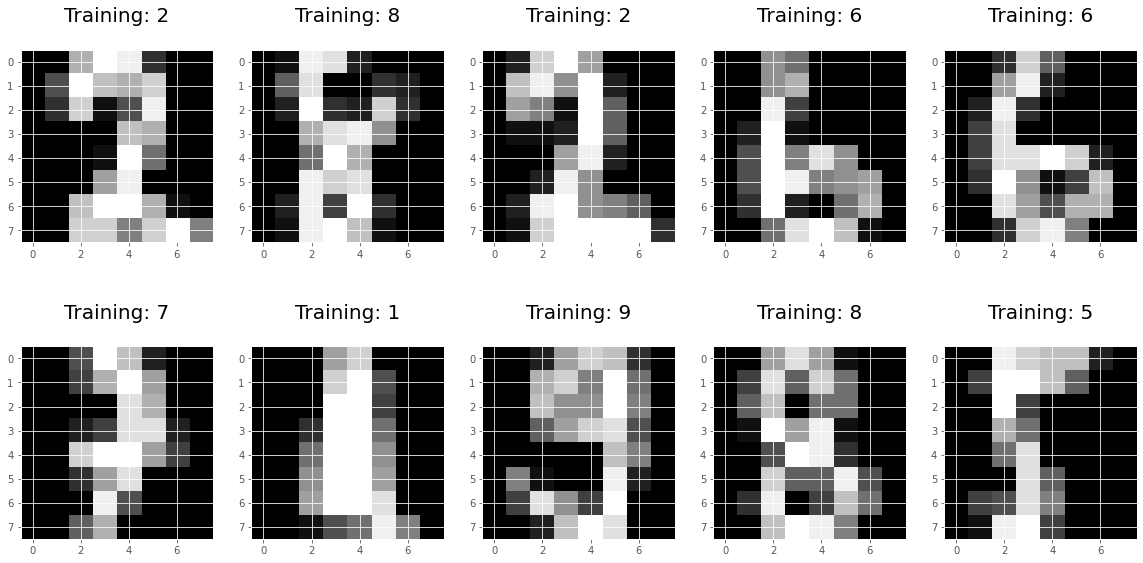

In [ ]:
y_pred = log_reg.predict(x_test)

print("PREDICTIONS:\n")
print(y_pred[:10])
print("\n")

plt.figure(figsize=(20,10))
plt.title("Test image data")

for index, (image, label) in enumerate(zip(x_test[0:10], y_test[0:10])):
 plt.subplot(2, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
# Accuracy

acc = log_reg.score(x_test,y_test)
print("Accuracy obtained on test set: {}".format(round(acc*100,3)))

Accuracy obtained on test set: 96.667


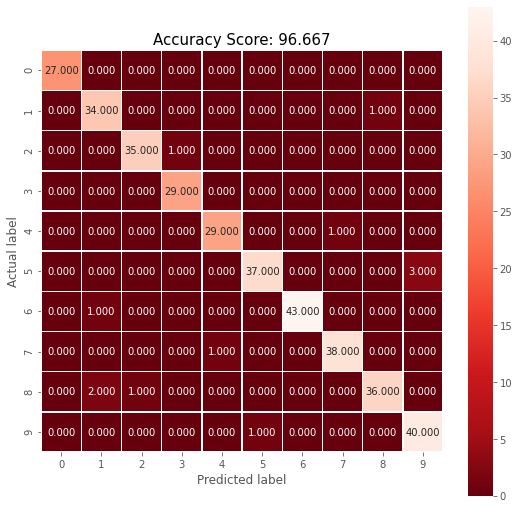

In [ ]:
# Visualizing confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(acc*100,3))
plt.title(all_sample_title, size = 15);

## References

1. https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a